In [13]:
from embedding import load_embeddings_safetensors, read_fasta
emb, ids = load_embeddings_safetensors("outputs/embedding-newly-discovered-3B-avg.safetensors")
seqs = read_fasta("data/newly_discovered_dissimilar_proteins_2024.fasta")

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

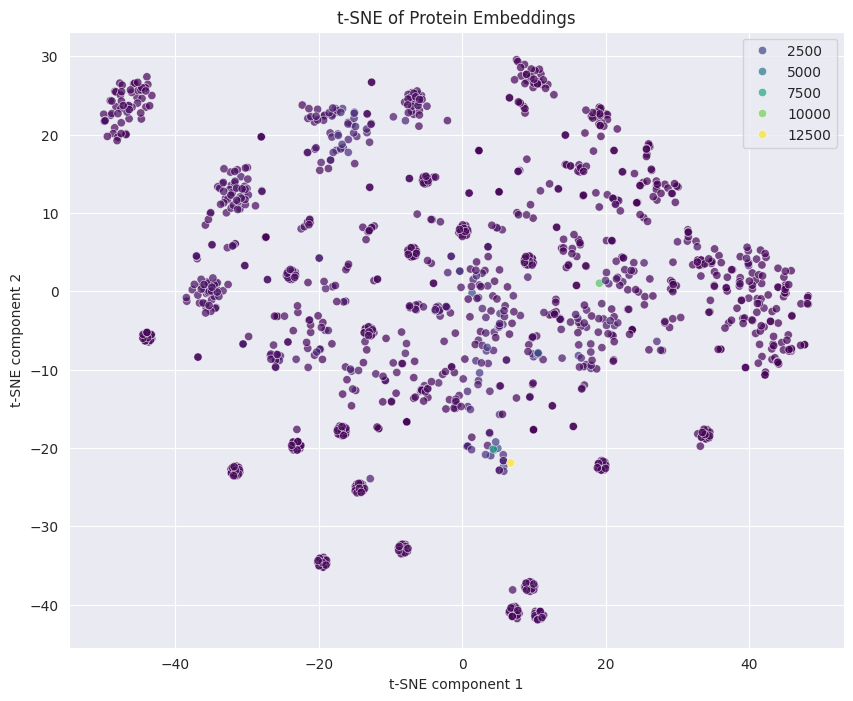

In [30]:
tsne_reducer = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_embeddings = tsne_reducer.fit_transform(emb.numpy())

labels = [len(s[1]) for s in seqs]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=tsne_embeddings[:, 0], y=tsne_embeddings[:, 1],
    palette='viridis', hue=labels, alpha=0.7
)
plt.title('t-SNE of Protein Embeddings')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

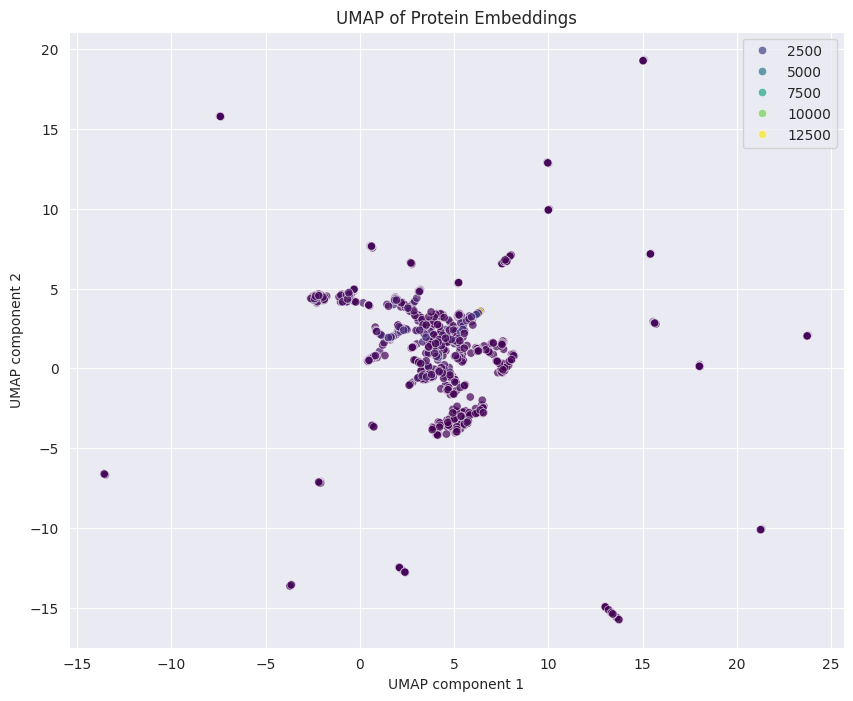

In [31]:
import umap

umap_reducer = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1)
umap_embeddings = umap_reducer.fit_transform(emb.numpy())

labels = [len(s[1]) for s in seqs]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=umap_embeddings[:, 0], y=umap_embeddings[:, 1],
    palette='viridis', hue=labels, alpha=0.7
)
plt.title('UMAP of Protein Embeddings')
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')
plt.show()

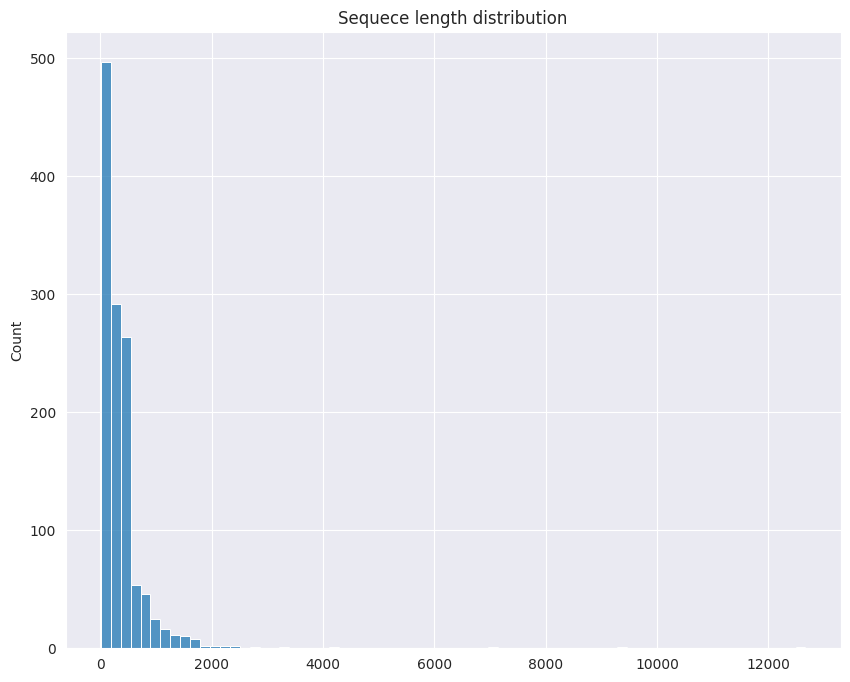

In [24]:
plt.figure(figsize=(10, 8))
sns.histplot([len(s[1]) for s in seqs])
plt.title('Sequece length distribution')
plt.show()

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot([len(s[1]) for s in seqs])
plt.title('Sequece length distribution')
plt.show()